# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №9

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

## Основные теоретические положения

$\bullet$ Дискретный сигнал $\displaystyle x_0, \dots, x_{N-1}$, как правило, получается при дискретизации аналогового (определённого во все моменты времени) сигнала $\displaystyle s(t)$

Пусть отсчёты $\displaystyle x_k$, дискретного сигнала получены в результате равномерной дискретизации сигнала $\displaystyle s(t)$ с шагом дискретизации, равным единице. 

$$x_k = \displaystyle s(t_k)$$, где $\displaystyle t_k - t_{k-1}=T, k = 0,1,\dots N-1, T=1$

Если 

$$\displaystyle t_k - t_{k-1}= \Delta T$$, где $\displaystyle \Delta t \not = 1, k = 1, 2,\dots, N-1$, 

то вводим $\displaystyle \hat t_k = \dfrac{(t_k - t_0)}{\Delta t}$, где $\displaystyle k = 0,1,\dots N-1$

Получаем

$$\displaystyle \hat t_k = k \\ s(\hat t_k)=s(k\Delta t)$$

, где $\displaystyle k = 0, 1, \dots, N-1$

$\bullet$ Дискретное преобразование Фурье. Так как $\displaystyle s(t)$ переодическая функция, то её можно разложить в ряд Фурье, коэффициенты которого вычисляются по формуле:

$$\displaystyle X(n)=\dfrac{1}{NT}\int_0^{NT}s(t)\cdot e^{-i\omega_nt}\mathrm{d}x \\ X(n) = \sum_{k=0}^{N-1}x_ke^{-i\frac{2\pi nk}{N}}$$

, где $\displaystyle n = 0,1,\dots,N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
from math import pi

In [2]:
def plot(df, param_y, title):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y=param_y, linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$x(t)$')
    plt.title(title)
    plt.show()
    
def plot_lines(df, title, param_x1, param_x2, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x=param_x1, y='Y', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df['Y'], linewidth=2.2)
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_lines_x2(data, df, title, param_x, param_x2, param_ymax, param_ymax1, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=data, x=param_x, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax], linewidth=2.2, linestyles='--')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax1], linewidth=2.2, color='red')
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_lines_x3(data, df, title, param_x, param_x2, param_ymax, param_ymax1, param_ymax2, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=data, x=param_x, y='vals', hue='', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax], linewidth=2.2, linestyles='dotted')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax1], linewidth=2.2, linestyles='dashed', color='green')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax2], linewidth=2.2, color='red')
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_lines_x4(data, df, title, param_x, param_x2, param_ymax, param_ymax1, param_ymax2, param_ymax3, oX, oY):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=data, x=param_x, y='vals', hue='cols', s=70,
                 kind='scatter', height=8.27, aspect=11.7/8.27)
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax], linewidth=2.2, linestyles='dotted')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax1], linewidth=2.2, color='r', linestyles='dashed')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax2], linewidth=2.2, color='g')
    plt.vlines(x=param_x2, ymin=0, ymax=df[param_ymax3], linewidth=1.2, color='r', linestyles='dotted')
    ax.set_axis_labels(oX, oY)
    plt.title(title)
    plt.show()
    
def plot_H(df, title="None"):
    sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
    ax = sns.relplot(data=df, x='t', y='vals', hue='', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
    ax.set_axis_labels(r'$t$', r'$\tilde H(t)$')
    plt.title(title)
    plt.show()
    
    
def rectangle(orig):
    integr = np.empty(len(orig))
    integr[0] = 0
    for i in range(1, len(orig)):
        integr[i] = integr[i-1] + orig[i-1]
    return integr

def trapezoid(orig):
    integr = np.empty(len(orig))
    integr[0] = 0
    for i in range(1, len(orig)-1):
        integr[i] = integr[i - 1] + (orig[i] + orig[i-1]) / 2
    return integr

def simpson(orig):
    integr = np.empty(len(orig))
    integr[0] = 0
    for i in range(1, len(orig)-1):
        integr[i] = integr[i-1] + (orig[i-1] + 4*orig[i] + orig[i+1]) / 3
    return integr

## Пункт 1

$\bullet$ Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_kt+\varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от $0$ до $\pi$, изменяющиеся с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от $1$ до $11$, определяемые случайным образом с помощью датчика равномерно распределённых случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от $0$ до $0.5$. Дискретная последовательность должна включать в себя $32$ отсчёта $(N=31)$

In [3]:
def signal(n):
    t, Y = np.linspace(0, 31, n), 0
    A = np.random.randint(1, 11, 11)
    W = np.arange(0, 1.01*np.pi, 0.1*np.pi)
    Phi = np.random.uniform(0, 0.5, [11,])
    for a, w, phi in zip(A, W, Phi):
        Y += a*np.cos(w*t+phi)
    Y = Y/np.sum(A)
    return t, Y

In [4]:
t, Y = signal(310)
df_analog = pd.DataFrame({'t': t, 'Y': Y})

In [5]:
df_digital = df_analog.iloc[np.concatenate((np.linspace(0, 300, 31), [309]), axis=0)]

## Пункт 2

$\bullet$ Визуализировать исходные аналоговый и дискретизированный сигналы.

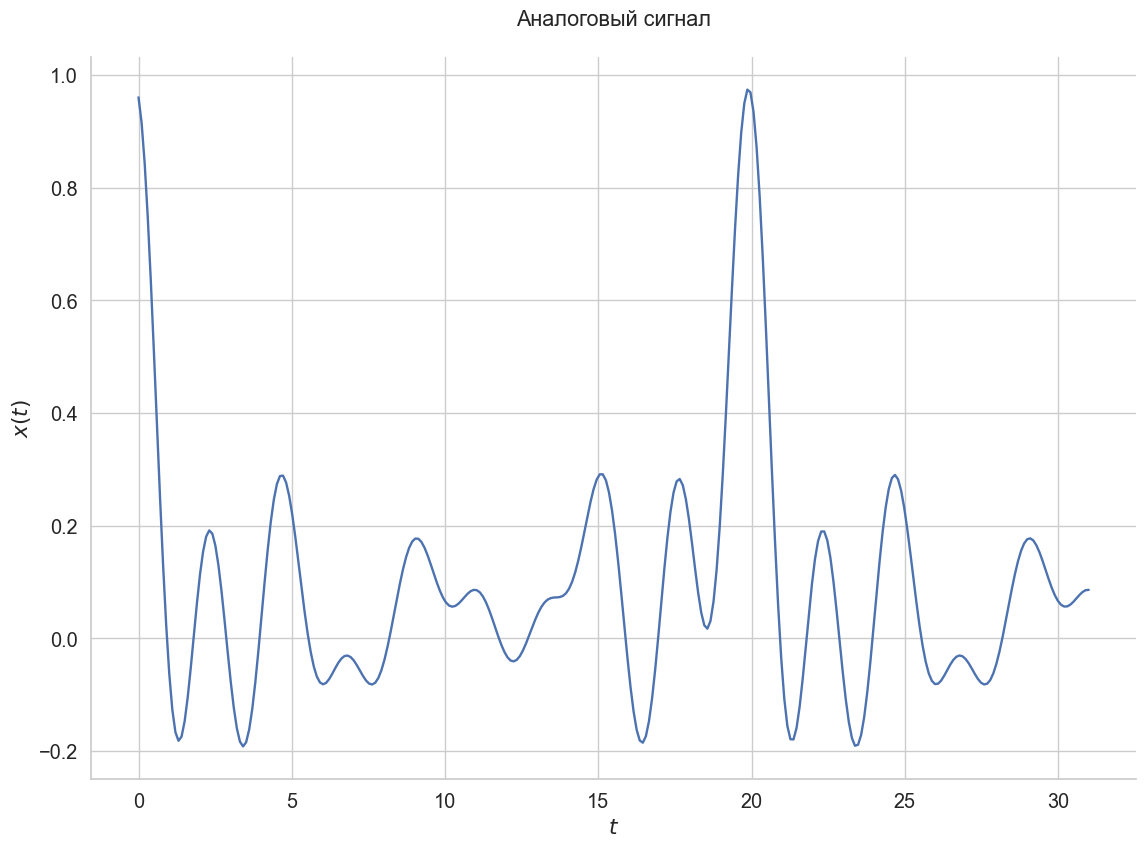

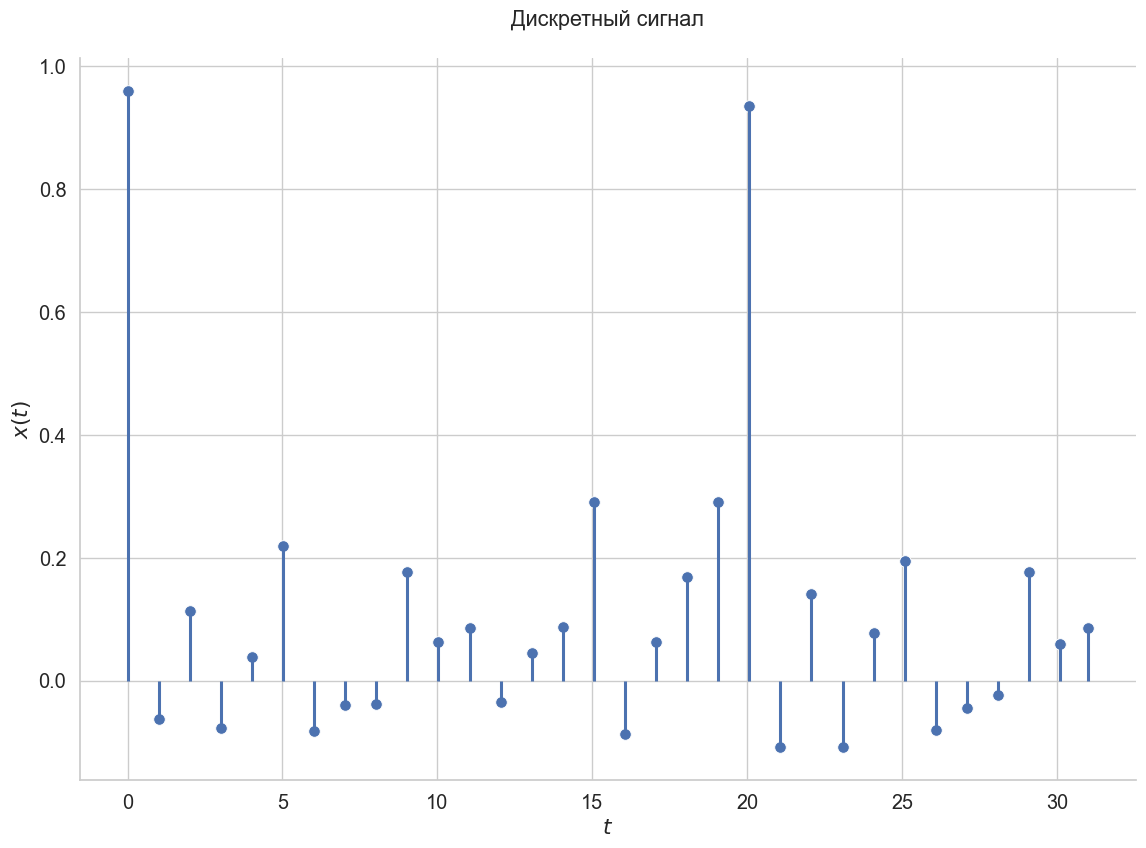

In [6]:
plot(df_analog, 'Y',"Аналоговый сигнал\n")
plot_lines(df_digital, "Дискретный сигнал\n", 
           't', df_digital['t'],
          r'$t$', r'$x(t)$')

## Пункт 3

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Представим дискретный сигнал в виде функции от времени:

$$\displaystyle s(t)=\sum_{k=-\infty}^\infty x_k\delta(t-k)$$

Тогда спектр дискретного сигнала:

$$\displaystyle S(\omega)=\sum_{k=-\infty}^\infty x_ke^{-i\omega k}$$

Другое представление дискретного сигнала:

$$\displaystyle s_d(t)=s(t)\sum_{k=-\infty}^\infty \delta(t-kT)$$

Представим полученноу сумму в виде комплексного ряда Фурье:

$$\displaystyle S_d(\omega)=\dfrac{1}{T}\sum_{k=-\infty}^\infty S\bigg(\omega - \dfrac{2\pi k}{T}\bigg)$$

In [7]:
df_p3 = df_digital.copy()
df_p3['Y'] = np.abs((df_p3['Y'].values))

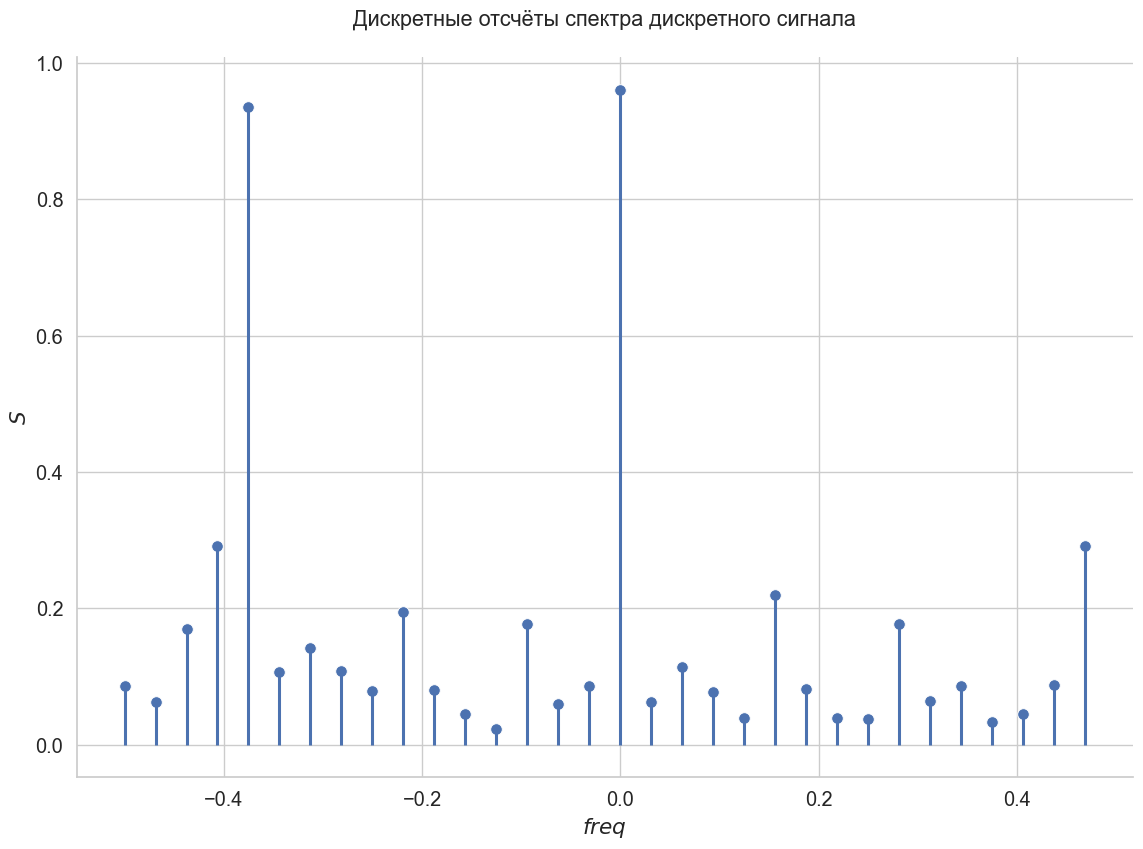

In [8]:
plot_lines(df_p3, "Дискретные отсчёты спектра дискретного сигнала\n", 
           fftfreq(32,1), fftfreq(32,1),
          r'$freq$', r'$S$')

## Пункт 4

Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание по $5$ и $9$ точкам осуществляется с помощью полинома первой степени, а коэффициенты в передаточной функции одинаковы.

Передаточные функции $5$-точечного и $9$-точечного НЦФ в $z$-области:

$$\displaystyle H_5(z) = \dfrac{1}{5}\big(z^{-2}+z^{-1}+1+z^1+z^2\big)
\\H_9(z)=\dfrac{1}{9}\big(z^{-4}+z^{-3}+z^{-2}+z^{-1}+z^{-1}+1+z^1+z^2+z^3+z^4\big)$$

Общая формула передаточной функции в частотной области:

$$\displaystyle H(\omega)=\dfrac{sin\Big(\big(N+\frac{1}{2}\big)\cdot\omega\Big)}{\Big(N+\frac{1}{2}\Big)}=sinc\Bigg(\bigg(n+\dfrac{1}{2}\bigg)\cdot\omega\Bigg)$$

## Пункт 5

Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

In [9]:
df_p5 = df_digital.copy()
df_p5['original'] = df_p5['Y']

df_p5['5points'] = np.convolve(df_digital['Y'], np.ones(5), 'same') / 5
df_p5['9points'] = np.convolve(df_digital['Y'], np.ones(9), 'same') / 9

df_p5_5 = df_p5.melt(id_vars='t', value_vars=['original', '5points'], var_name='cols', value_name='vals')
df_p5_9 = df_p5.melt(id_vars='t', value_vars=['original', '9points'], var_name='cols', value_name='vals')

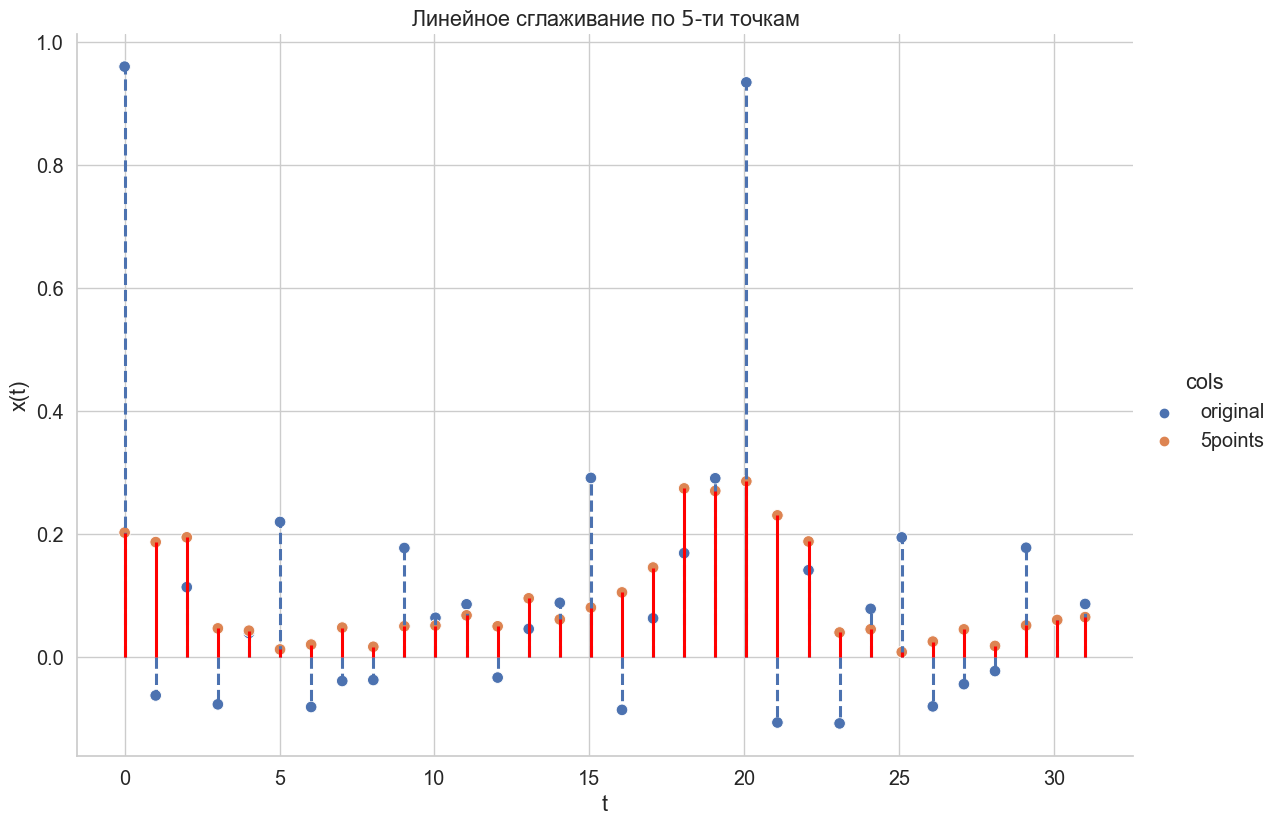

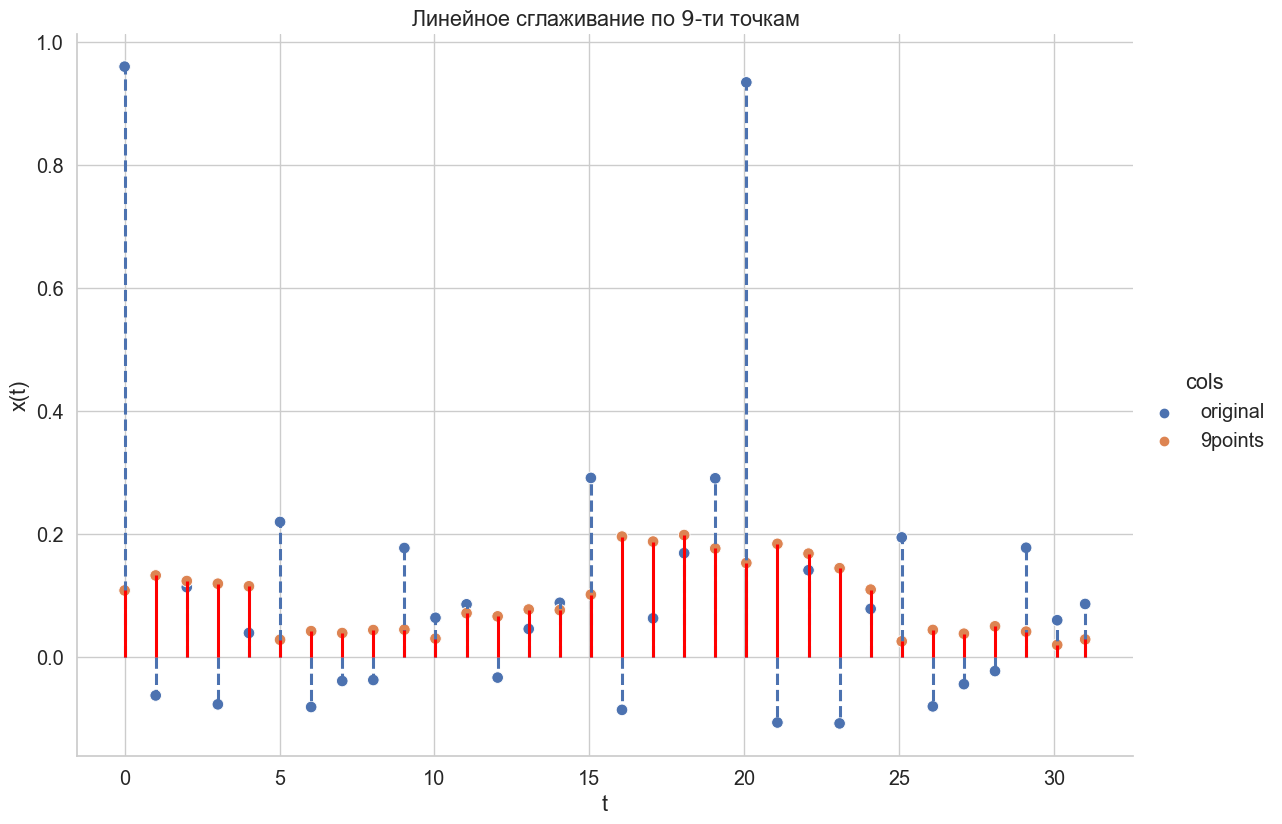

In [10]:
plot_lines_x2(df_p5_5, df_p5, 
              r"Линейное сглаживание по $5$-ти точкам",
             't', df_p5['t'], 'original', '5points', r't', r'x(t)')
plot_lines_x2(df_p5_9, df_p5, 
              r"Линейное сглаживание по $9$-ти точкам",
             't', df_p5['t'], 'original', '9points', r't', r'x(t)')

## Пункт 6

С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

In [11]:
fftf_dt = np.concatenate((fftfreq(32, 1), fftfreq(32, 1)), axis=0)
fftf_t = fftfreq(32, 1)

df_p5['DFP_original'] = 2*np.abs(fft(df_p5['Y'].values)) / 32
df_p5['DFP_5_points'] = 2*np.abs(fft(df_p5['5points'].values)) / 32
df_p5['DFP_9_points'] = 2*np.abs(fft(df_p5['9points'].values)) / 32

df_p5_5_dfp = df_p5.melt(id_vars='t', value_vars=['DFP_original', 'DFP_5_points'], var_name='cols', value_name='vals')
df_p5_9_dfp = df_p5.melt(id_vars='t', value_vars=['DFP_original', 'DFP_9_points'], var_name='cols', value_name='vals')

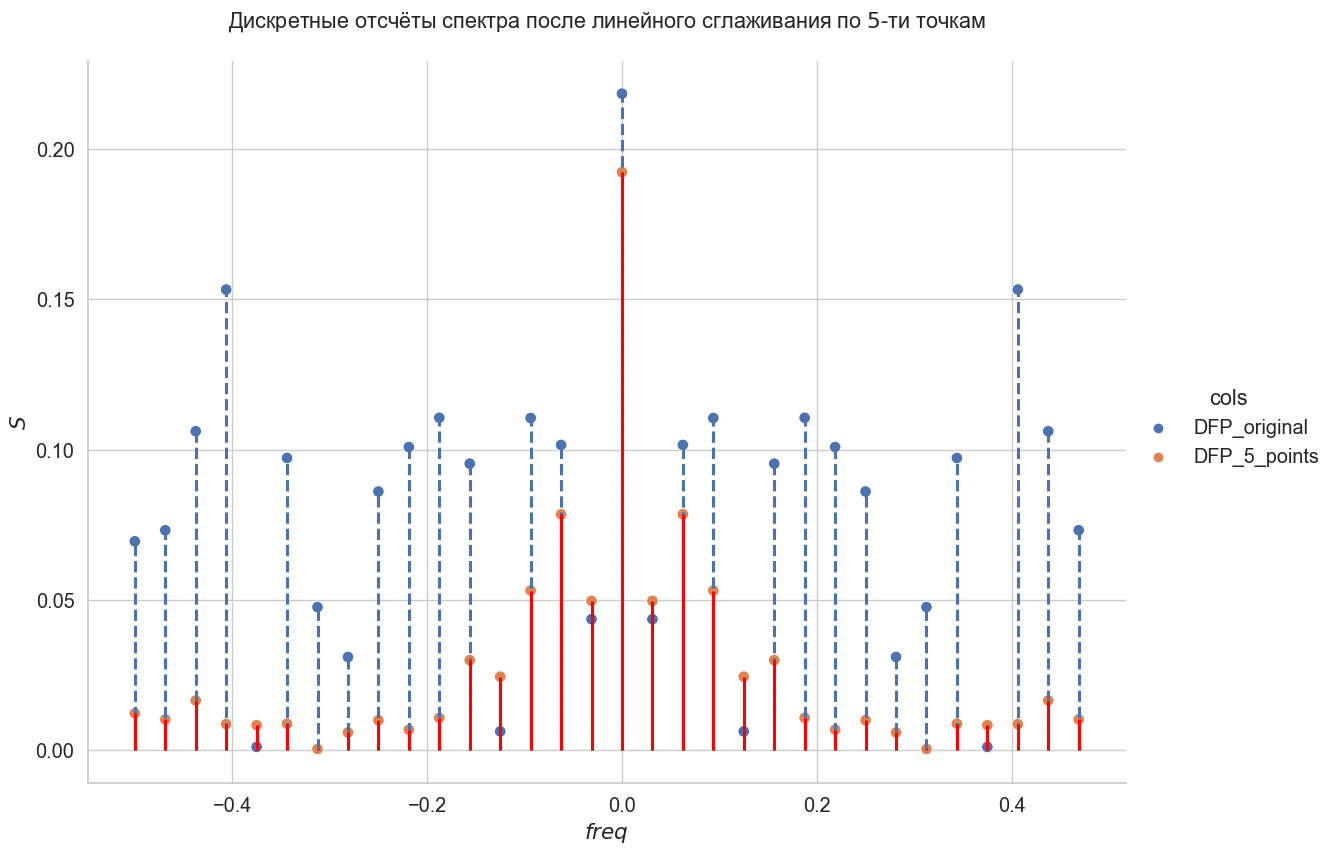

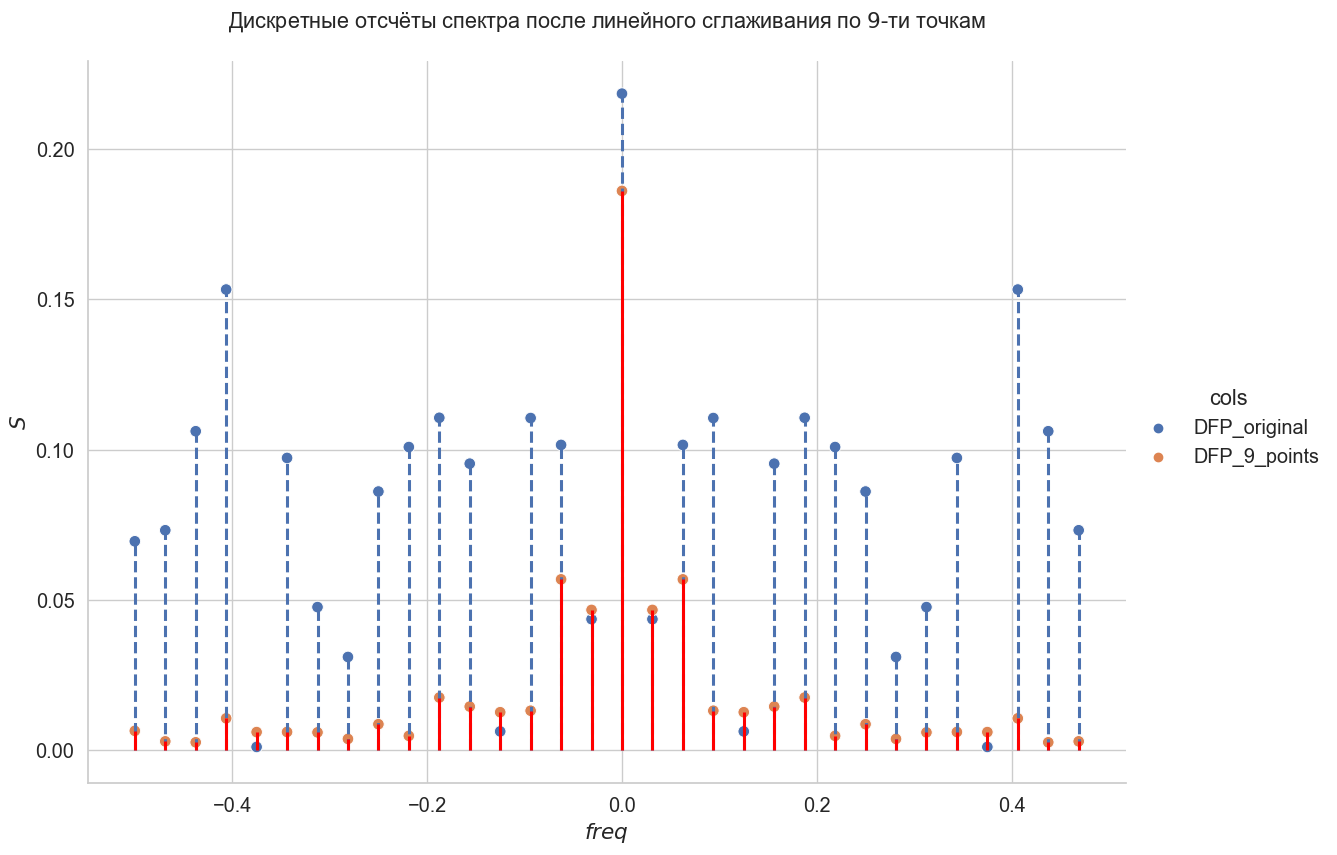

In [12]:
plot_lines_x2(df_p5_5_dfp, df_p5,
             "Дискретные отсчёты спектра после линейного сглаживания по $5$-ти точкам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_5_points',
             r'$freq$', r'$S$')

plot_lines_x2(df_p5_9_dfp, df_p5,
             "Дискретные отсчёты спектра после линейного сглаживания по $9$-ти точкам\n",
             fftf_dt, fftf_t,
             'DFP_original', 'DFP_9_points',
             r'$freq$', r'$S$')

## Пункт 7

Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

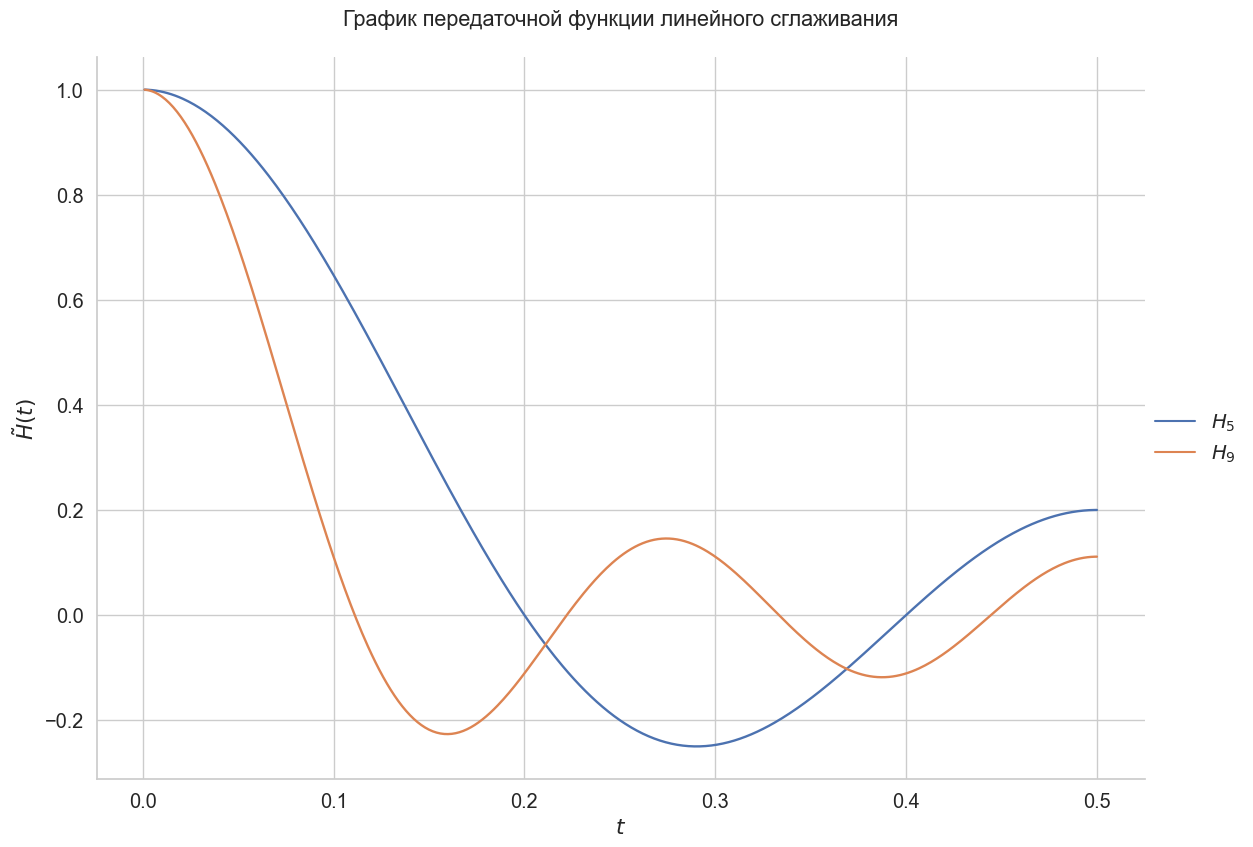

In [13]:
th = np.linspace(0.001, 0.5, 500)

H_5 = lambda f: (np.sin(5*pi*f))/(5*np.sin(pi*f))
H_9 = lambda f: (np.sin(9*pi*f))/(9*np.sin(pi*f))

df = pd.DataFrame({'t': th, r'$H_5$': H_5(th), r'$H_9$': H_9(th)})
df_m = df.melt(id_vars='t', var_name='', value_name='vals')
plot_H(df_m, "График передаточной функции линейного сглаживания\n")

Преобразование Фурье сопостовляет непрерывной во времени бесконечной функции $\displaystyle y_n$ другую, непрерывную по частоте, бесконечную функцию, а именно спектр $\displaystyle X(n)$. Графики подтверждают сделанные выводы касаемо полосы пропускания и ослабления уровня.

## Пункт 8

Повторить п. 4–7 для следующих фильтров:

    a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
    b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Передаточная функция имеет вид:

$$\displaystyle H(\omega)=\dfrac{e^{i\omega}-e^{-i\omega}}{2}$$

Формула численного дифференцирования 1-го порядка:

$$\displaystyle y^{'}_n = \dfrac{1}{2}(x_{n+1}-x{n-1})$$

### a) Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

In [14]:
df_8a = df_digital.copy()
df_8a['original'] = df_8a['Y']
df_8a = df_8a.drop(['Y'], axis=1)
df_8a['diff'] = np.convolve(df_digital['Y'], np.array([-1, 0, 1]), 'same') / 2
df_8a_m = df_8a.melt(id_vars='t', var_name='cols', value_name='vals')

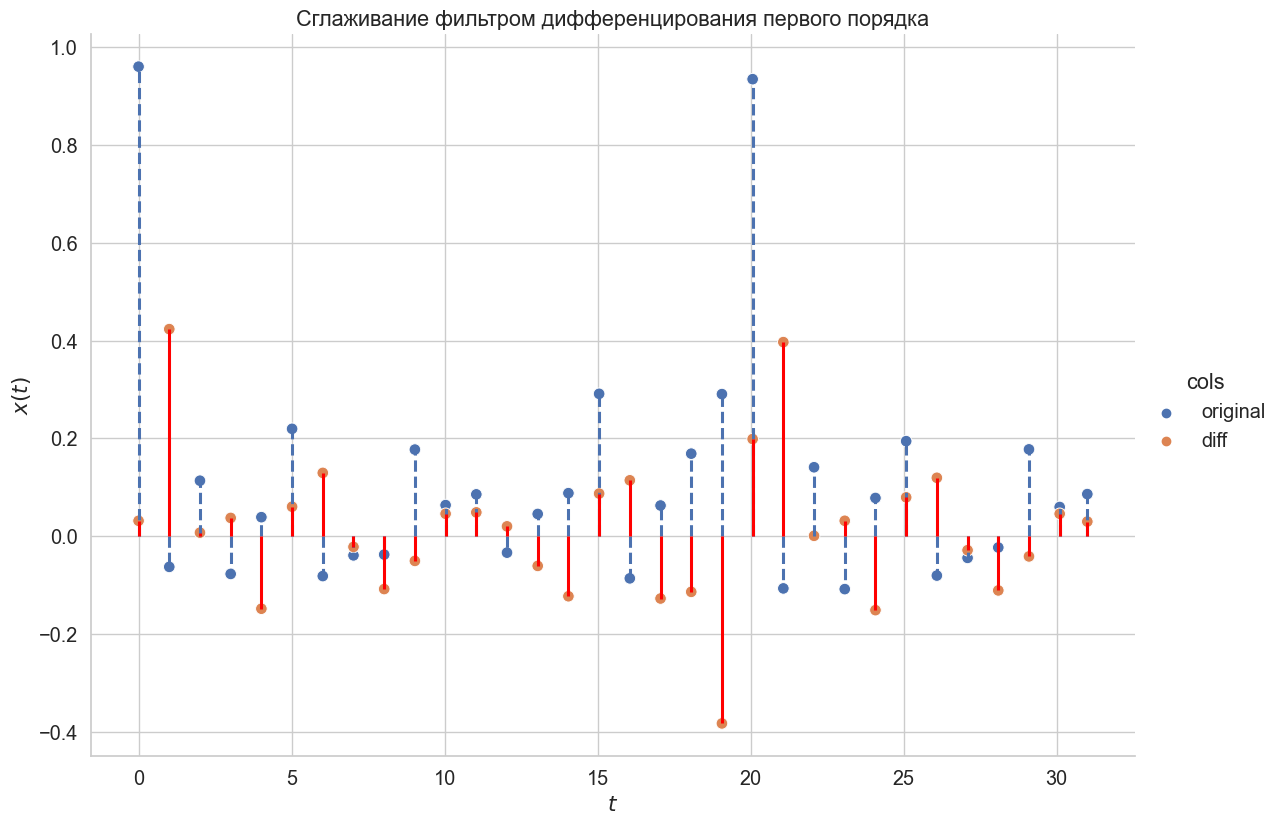

In [15]:
plot_lines_x2(df_8a_m, df_8a,
             "Сглаживание фильтром дифференцирования первого порядка",
             't', df_8a['t'],
             'original', 'diff',
             r'$t$', r'$x(t)$')

In [16]:
df_8a['DFP_original'] = 2 * np.abs(fft(df_8a['original'].values)) / 32
df_8a['DFP_diff'] = 2 * np.abs(fft(df_8a['diff'].values)) / 32
df_8a_m_diffdfp = df_8a.melt(id_vars='t', value_vars=['DFP_original', 'DFP_diff'], var_name='cols', value_name='vals')

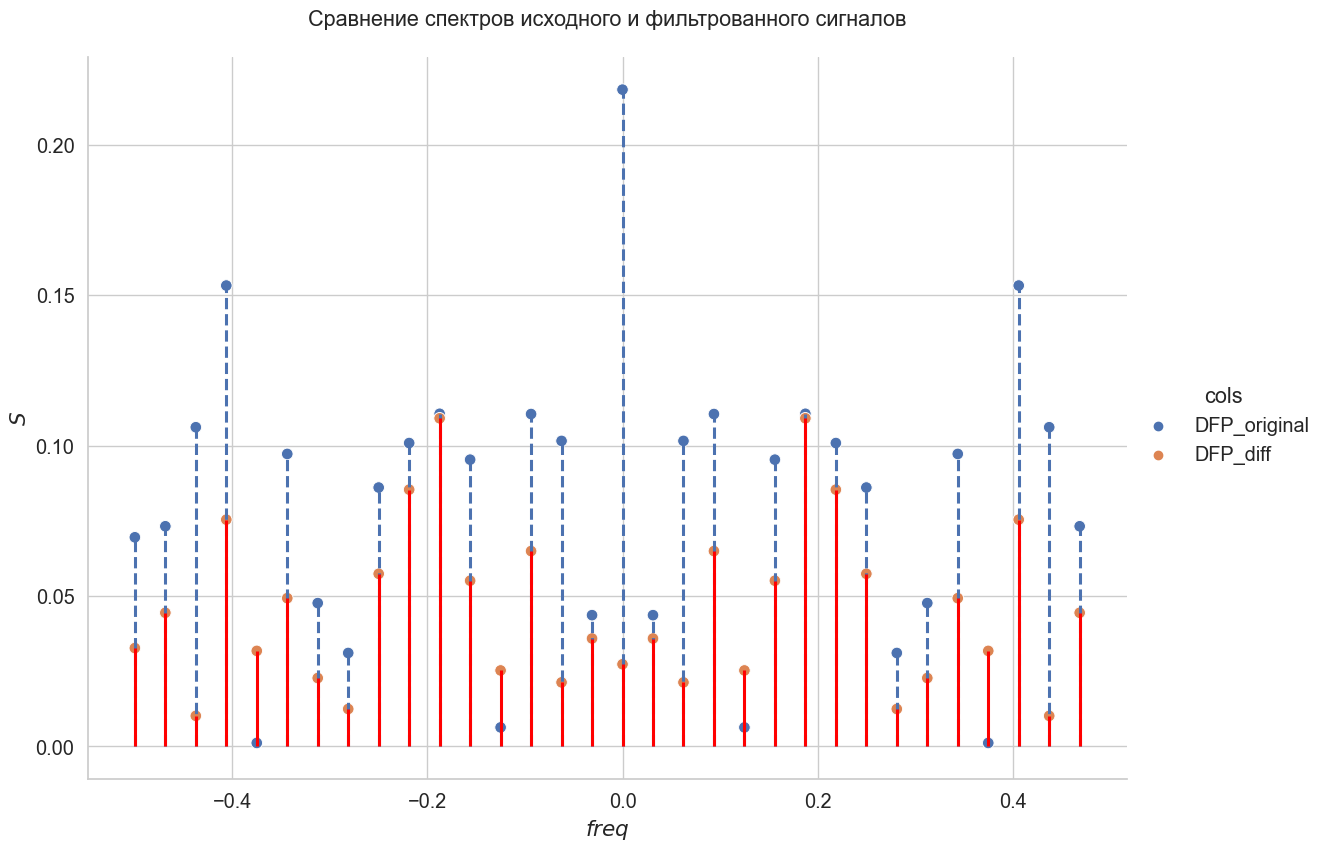

In [17]:
plot_lines_x2(df_8a_m_diffdfp, df_8a,
             "Сравнение спектров исходного и фильтрованного сигналов\n",
              fftf_dt, fftf_t, 
             'DFP_original', 'DFP_diff',
             r'$freq$', r'$S$')

Анализируя график спектра, можно заметить, что средние частоты действительно усиливаются, но при этом низкие и высокие частоты сглаживаются.

### b) Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Передаточная функция для рекурсивного фильтра, соответствующего численному интегрированию для:

$\textbf{Прямоугольников}:$

$$\displaystyle H(\omega)=\dfrac{e^{\frac{i\omega}{2}}}{e^{i\omega}-1}=\dfrac{1}{2i\cdot sin\big(\frac{\omega}{2}\big)}$$

$\textbf{Трапеций}:$

$$\displaystyle H(\omega)=\dfrac{e^{i\omega}+1}{2(e^{i\omega}-1)}=\dfrac{cos\big(\frac{\omega}{2}\big)}{2i\cdot sin\big(\frac{\omega}{2}\big)}$$

$\textbf{Симпсона}:$

$$\displaystyle H(\omega)=\dfrac{e^{-i\omega}+4+e^{i\omega}}{3(e^{i\omega}-e^{-i\omega})}=\dfrac{cos(\omega)+2}{3i\cdot sin(\omega)}$$

In [18]:
df_8b = df_digital.copy()
df_8b['original'] = df_8b['Y']
df_8b = df_8b.drop(['Y'], axis=1)
df_8b['Rectangle'] = rectangle(df_8b['original'].values)
df_8b['Trapezoid'] = trapezoid(df_8b['original'].values)
df_8b['Simpson'] = simpson(df_8b['original'].values)
df_8b_m = df_8b.melt(id_vars='t', var_name='cols', value_name='vals')

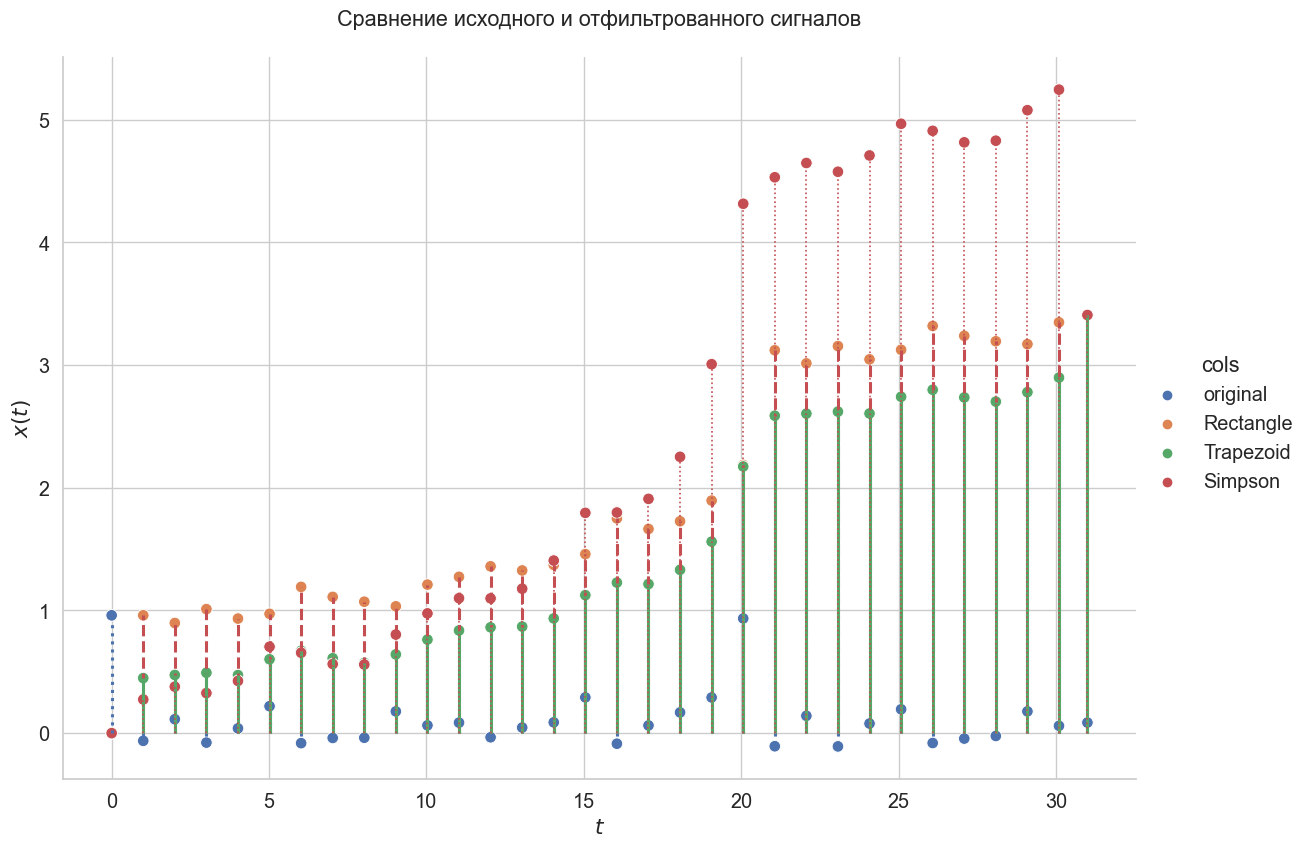

In [19]:
plot_lines_x4(df_8b_m, df_8b,
             'Сравнение исходного и отфильтрованного сигналов\n', 
              't',
             df_8b['t'],
             'original', 'Rectangle', 'Trapezoid', 'Simpson',
             r'$t$', r'$x(t)$')

In [20]:
df_8b['DFP_original'] = 2 * np.abs(fft(df_8b['original'].values)) / 32
df_8b['DFP_rectangle'] = 2 * np.abs(fft(df_8b['Rectangle'].values)) / 32
df_8b['DFP_trapezoid'] = 2 * np.abs(fft(df_8b['Trapezoid'].values)) / 32
df_8b['DFP_simpson'] = 2 * np.abs(fft(df_8b['Simpson'].values)) / 32
df_8b_m_Rect_dfp = df_8b.melt(id_vars='t', value_vars=['DFP_rectangle', 'DFP_original'], var_name='cols', value_name='vals')
df_8b_m_Trap_dfp = df_8b.melt(id_vars='t', value_vars=['DFP_trapezoid', 'DFP_original'], var_name='cols', value_name='vals')
df_8b_m_Simp_dfp = df_8b.melt(id_vars='t', value_vars=['DFP_simpson', 'DFP_original'], var_name='cols', value_name='vals')

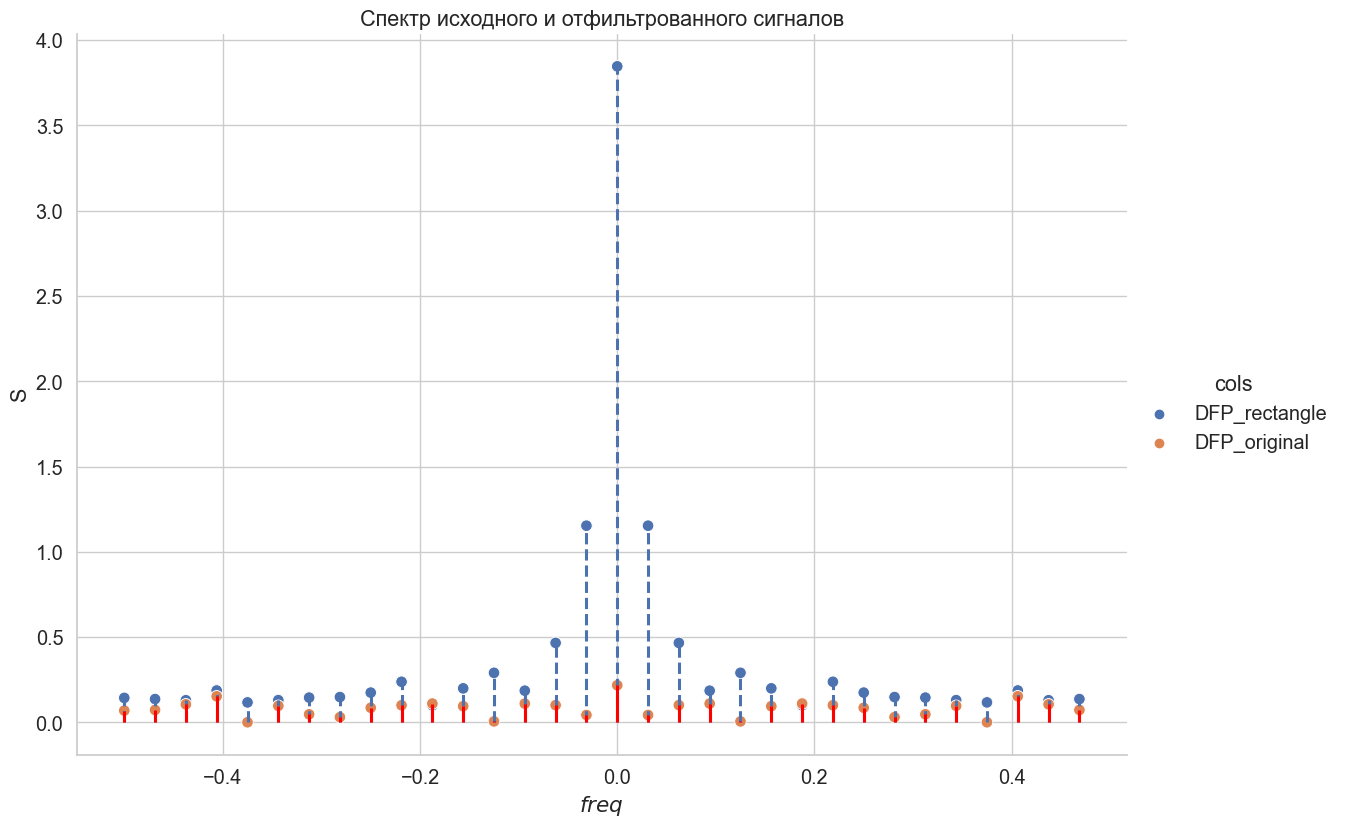

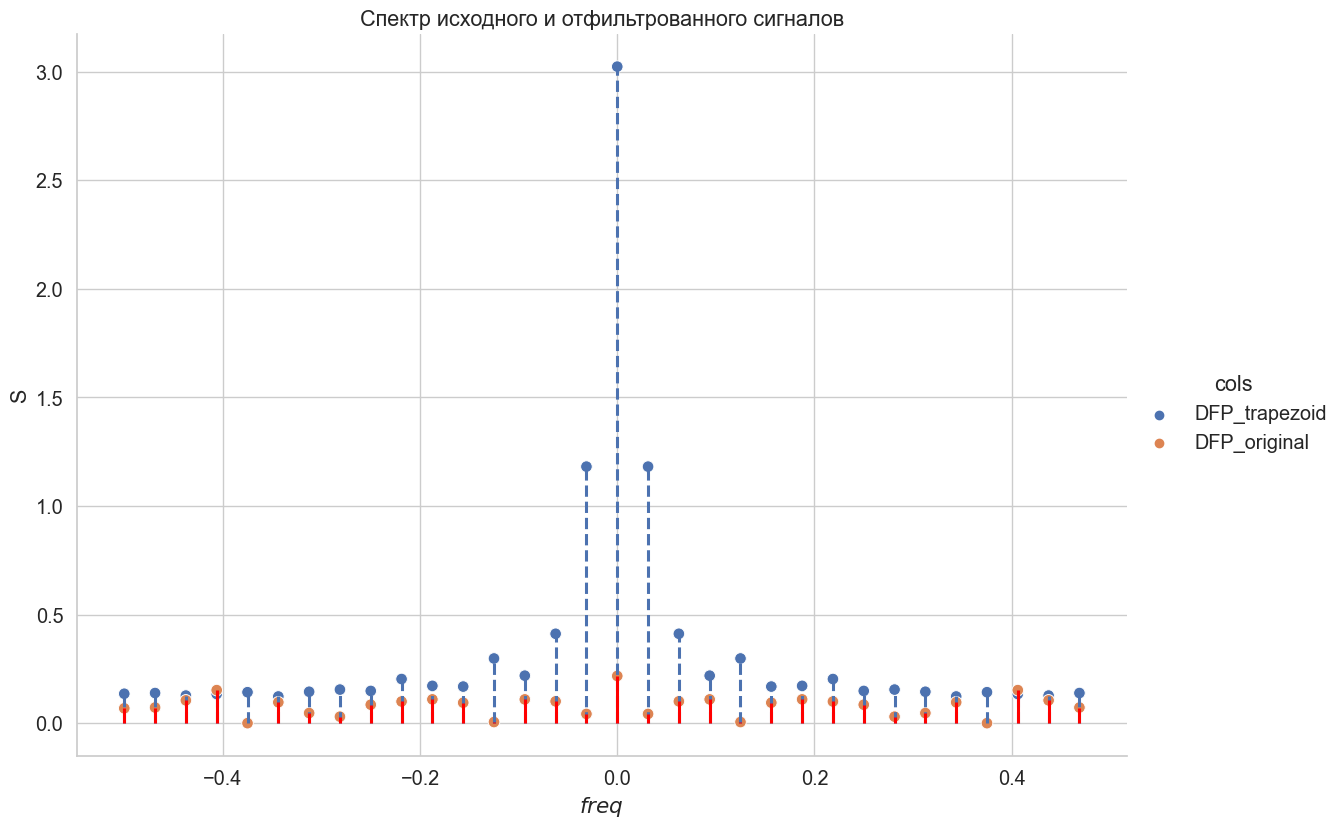

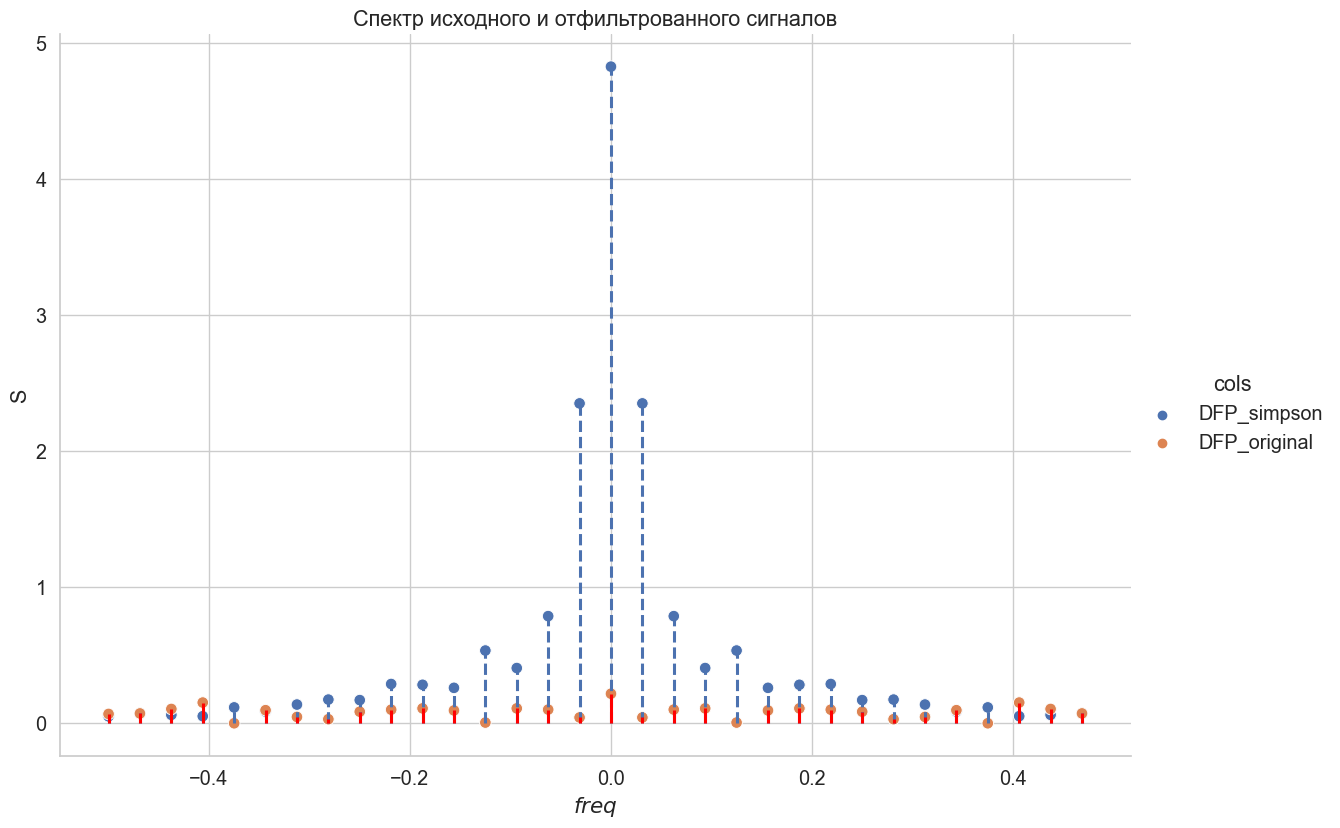

In [21]:
plot_lines_x2(df_8b_m_Rect_dfp, df_8b,
             'Спектр исходного и отфильтрованного сигналов', fftf_dt, fftf_t,
             'DFP_rectangle', 'DFP_original',
             r'$freq$', r'S')
plot_lines_x2(df_8b_m_Trap_dfp, df_8b,
             'Спектр исходного и отфильтрованного сигналов', fftf_dt, fftf_t,
             'DFP_trapezoid', 'DFP_original',
             r'$freq$', r'S')
plot_lines_x2(df_8b_m_Simp_dfp, df_8b,
             'Спектр исходного и отфильтрованного сигналов', fftf_dt, fftf_t,
             'DFP_simpson', 'DFP_original',
             r'$freq$', r'S')

Отличия сглаживаний интегрированием с помощью различных формул, исходя из спектров:

$\bullet$ Сглаживание интегрированием по формулам прямоугольников значительно усиливает низкие частоты в небольшом диапазоне

$\bullet$ Сглаживание интегрированием по формулам трапеции усиливает низкие частоты, но в большем диапазоне и с 
меньшим усилением

$\bullet$ Сглаживание интегрированием по формулам Симпсона усиливает весь спектр частот, особенно низкие частоты

## Выводы

В ходе лабораторной работы были получены практические навыки выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также аналази получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). Также были построены соответствующие графики.